In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from statistics import mode

def toSentence(list_words): # Convert list of words into sentence
        sentence = ' '.join(word for word in list_words)
        return sentence

data = pd.read_csv("labelled.csv")
X = data['text_preprocessed'].apply(toSentence) 
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
polarity_encode = {"Negatif" : -1, "Positif" : 1}
y = data['Sentiments'].map(polarity_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

clf1 = RandomForestClassifier(random_state=42)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 37

{'classifier': RandomForestClassifier(max_depth=20, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 100}

In [22]:
predictions = gs.predict(X_test)

if mode(predictions) == -1:
    hasil_prediksi = "Username is Negative"
elif mode(predictions) == 1:
    hasil_prediksi = "Username is Positive"

print("Prediksi : ",predictions)
print("Hasil Prediksi: ",hasil_prediksi)

Prediksi :  [-1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1
  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1]
Hasil Prediksi:  Username is Negative


In [23]:
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.775
Test Precision: 0.7142857142857143
Test Recall: 0.8333333333333334
Test ROC AUC Score: 0.7803030303030304


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.73      0.84      0.78        19
           1       0.83      0.71      0.77        21

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40



Text(0.5, 1.0, 'Confusion Matrix')

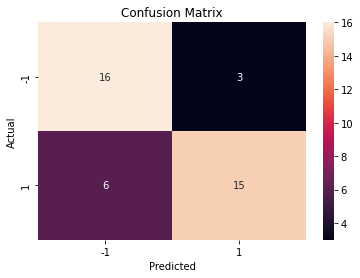

In [25]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, 
    xticklabels=[-1,1], 
    yticklabels=[-1,1],
    fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")